In [ ]:
import random 
import time
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [ ]:
# Size of Sidewalk
rowz = 6
columnz = 25
# Set Values
sidewalk = np.zeros(rowz*columnz)
litterChance = .2
wallChance = .2

# Place Litter and Walls
for tile in range(len(sidewalk)):
  litterDecide = random.random()
  wallDecide = random.random()
  sidewalk[tile] = -1
  if litterChance > litterDecide:
    sidewalk[tile] = .5
  if wallChance > wallDecide:
    sidewalk[tile] = -20

# Make 2D array
sidewalk = np.reshape(sidewalk,(rowz,columnz))

# Assign Start and End
for tile in range(sidewalk.shape[0]):
  sidewalk[tile][0] = -1
  sidewalk[tile][-1] = 100

untouchedSidewalk = sidewalk.copy()
# # Flatten
# sidewalk = sidewalk.ravel()

In [ ]:
def step_math(state, action):
  #0= Forward, 1= Right, 2= Left, 3= Back
  if action == 0:
    move_direction = 1    
  elif action ==1:
    move_direction = -sidewalk.shape[1]
  elif action ==2:
    move_direction = sidewalk.shape[1]
  else:
    move_direction = -1
  new_state = state + move_direction
  return new_state

def steps(exploration_rate, sidewalk, state, q_table):
  exploration_rate_threshold = random.uniform(0, 1)
  new_state = -1
  # Exploitation
  if exploration_rate_threshold > exploration_rate: 
    action = np.argmax(q_table[state,:]) 
    new_state = step_math(state, action)

  # Exploration
  else: 
    while (new_state <0) or (new_state >= sidewalk.shape[0]*sidewalk.shape[1]):
      if state % 25 == 0:
        action = random.randint(0,actions-2)
      else:
        action = random.randint(0,actions-1)
      new_state = step_math(state, action)
      

  # if (new_state <0) or (new_state >= 150):
  #   reward = -100
  # else:
  flat_sidewalk = sidewalk.ravel()
  reward = flat_sidewalk[new_state]
  if reward == .5:
    # print(flat_sidewalk.shape)
    flat_sidewalk[new_state] = -1
    sidewalk = np.reshape(flat_sidewalk,(rowz,columnz))

  if (reward == 100) or (reward == -100):
    done = True
  else:
    done = False

  return new_state, reward, done, action

In [ ]:
# Set Values 
rewards_all_episodes = []
total_episodes = 0
num_episodes = 5000
max_steps_per_episode = 200

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.001
exploration_decay_rate = 0.00075

actions = 4

# Make Qmap
q_table  = np.zeros([sidewalk.shape[0]*sidewalk.shape[1],actions])

# Make Grass
for i in range(sidewalk.shape[1]):
  q_table[i][1] = -100
  q_table[-i-1][2] = -100
for i in range(0,q_table.shape[0],25):
  q_table[i][3] = -100
  q_table[-i-1][0] = -100


# print(q_table)

In [ ]:
complete = 0
for episode in range(num_episodes):
    print("\repisode: ", episode, sep=' ', end='', flush=True)
    # print("episode: ", episode)
    state = 0
    sidewalk = untouchedSidewalk.copy()
    done = False
    rewards_current_episode = 0
    storeState = []
    for step in range(max_steps_per_episode): 
      new_state, reward, done, action = steps(exploration_rate, sidewalk, state, q_table)
      # print(new_state, reward, done, action)
      
      # Update Q-table for Q(s,a)
      q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

      state = new_state
      rewards_current_episode += reward 
      storeState.append(state)  
      # print(reward)
      # print(state)
      if done == True: 
        complete += 1
        # print("Last State Location: ", new_state)
        # print("Reward: ", reward)
        break
    
    # Exploration rate decay
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    total_episodes += 1
    rewards_all_episodes.append(rewards_current_episode)
print("Completed: ", complete)
print(total_episodes)
print(exploration_rate)

episode:  4999Completed:  4772
10000
0.024511855390639617


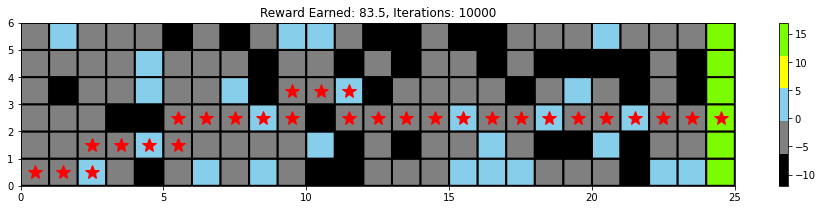

[1, 2, 27, 28, 29, 30, 55, 56, 57, 58, 59, 84, 85, 86, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]


In [ ]:
cmap = ListedColormap(["black", "grey", "skyblue", "yellow", "lawngreen"])

fig, axs = plt.subplots(1, figsize=(16, 3), squeeze=False)

for [ax, cmap] in zip(axs.flat, [cmap]):
    ax.set_title('Reward Earned: ' + str(rewards_current_episode) + ", Iterations: "+ str(total_episodes))
    psm = ax.pcolor(untouchedSidewalk, cmap=cmap, vmin=-12, vmax=17, edgecolors='k', linewidths=2)
    fig.colorbar(psm, ax=ax)


arr = np.zeros([sidewalk.shape[0]*sidewalk.shape[1]])
for i in storeState:
  arr[i] = 1
arr = np.reshape(arr,(sidewalk.shape[0],sidewalk.shape[1]))

x = [.5]
y = [.5]
for rows in range(len(arr)):
  for columns in range(len(arr[0])):
    if arr[rows][columns] != 0:
      x.append(columns +.5)
      y.append(rows +.5)



ax.plot(x,y,"r",marker='*', linewidth=0, markersize=15)
plt.show()

print(storeState)